<a href="https://colab.research.google.com/github/MiracleCakra/2341720032_ML_2025/blob/main/JS14/TP_JS14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 1
## Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%

## Import Library & Load Data

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks, optimizers
import matplotlib.pyplot as plt
import numpy as np

# 1. Load & Preprocess Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


# 2. Definisi Augmentasi Data dengan Menambahkan RandomTranslation

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomContrast(0.1),
])

# 3. Arsitektur Model (VGG-style Deep CNN)

In [12]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)

# Block 1: 32 Filters
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

# Block 2: 64 Filters
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

# Block 3: 128 Filters
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Block 4: 256 Filters (NEW - Menambah Kedalaman)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.4)(x)

# Classifier Head dengan Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model_cifar = models.Model(inputs=inputs, outputs=outputs)

# 4. Compile dengan Optimizer yang fleksibel

In [13]:
# Menggunakan learning rate awal sedikit lebih besar karena batch normalization membantu stabilitas
opt = optimizers.Adam(learning_rate=0.001)
model_cifar.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Callbacks

In [14]:
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
    min_lr=1e-6,
    verbose=1
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=12,
    restore_best_weights=True,
    verbose=1
)

# 6. Training

In [15]:
print("Training CIFAR-10 Model (Advanced)...")
history_cifar = model_cifar.fit(
    train_images, train_labels, 
    epochs=60, 
    batch_size=64,
    validation_data=(test_images, test_labels),
    callbacks=[lr_scheduler, early_stopping]
)

Training CIFAR-10 Model (Advanced)...
Epoch 1/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.2604 - loss: 2.3447 - val_accuracy: 0.4032 - val_loss: 1.7898 - learning_rate: 0.0010
Epoch 2/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.4338 - loss: 1.5854 - val_accuracy: 0.4777 - val_loss: 1.6828 - learning_rate: 0.0010
Epoch 3/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5094 - loss: 1.3596 - val_accuracy: 0.5355 - val_loss: 1.4730 - learning_rate: 0.0010
Epoch 4/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5636 - loss: 1.2300 - val_accuracy: 0.6115 - val_loss: 1.1667 - learning_rate: 0.0010
Epoch 5/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6018 - loss: 1.1318 - val_accuracy: 0.6071 - val_loss: 1.2189 - learning_rate: 0.0010
Epoch 6/60
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6292 - loss: 1.0569 - val_accuracy: 0.6405 - val_loss: 1.1268 - learning_rate: 0.0010
Epoch 7/60
782/782 ━━━━━━━━━━━━━━━━━━━

# 7. Evaluasi CIFAR-10

313/313 - 1s - 4ms/step - accuracy: 0.8477 - loss: 0.4623

Final Test Accuracy CIFAR-10: 84.77%


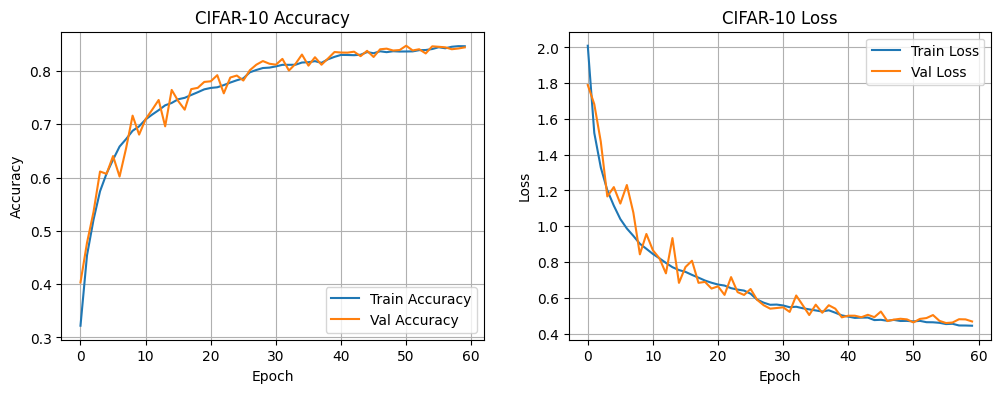

In [16]:
test_loss, test_acc = model_cifar.evaluate(test_images, test_labels, verbose=2)
print(f"\nFinal Test Accuracy CIFAR-10: {test_acc*100:.2f}%")

# Plot Hasil CIFAR-10
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label = 'Val Accuracy')
plt.title('CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Train Loss')
plt.plot(history_cifar.history['val_loss'], label = 'Val Loss')
plt.title('CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# TUGAS 2
## Buatlah model CNN untuk klasifikasi dataset MNIST.

In [6]:
# Load dataset MNIST
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = datasets.mnist.load_data()

# Normalize pixel values (0-1)
train_images_mnist, test_images_mnist = train_images_mnist / 255.0, test_images_mnist / 255.0

# Reshape data
train_images_mnist = train_images_mnist.reshape((60000, 28, 28, 1))
test_images_mnist = test_images_mnist.reshape((10000, 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Definisi Model CNN untuk MNIST

In [7]:
model_mnist = models.Sequential()

# Layer Konvolusi 1
model_mnist.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 2
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_mnist.add(layers.MaxPooling2D((2, 2)))

# Layer Konvolusi 3
model_mnist.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten & Dense
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(64, activation='relu'))
model_mnist.add(layers.Dense(10))

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile & Training MNIST

In [8]:
model_mnist.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_mnist = model_mnist.fit(train_images_mnist, train_labels_mnist, epochs=5,
                                validation_data=(test_images_mnist, test_labels_mnist))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8900 - loss: 0.3520 - val_accuracy: 0.9849 - val_loss: 0.0471
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9856 - val_loss: 0.0429
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9884 - val_loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9947 - loss: 0.0163 - val_accuracy: 0.9914 - val_loss: 0.0294


## Evaluasi Model MNIST

In [9]:
test_loss, test_acc_mnist = model_mnist.evaluate(test_images_mnist, test_labels_mnist, verbose=2)
print(f"\nFinal Test Accuracy MNIST: {test_acc_mnist*100:.2f}%")

313/313 - 2s - 8ms/step - accuracy: 0.9914 - loss: 0.0294

Final Test Accuracy MNIST: 99.14%
